# WEATHER ANALYSIS

In [477]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot') #default can be used too
plt.rcParams['figure.figsize'] = (17, 8)

In [478]:
weather = pd.read_csv('weather.csv', low_memory=False)

In [479]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [480]:
print(weather.shape)

(3665, 24)


In [481]:
print(weather.columns.values)

['date' 'max_temperature_f' 'mean_temperature_f' 'min_temperature_f'
 'max_dew_point_f' 'mean_dew_point_f' 'min_dew_point_f' 'max_humidity'
 'mean_humidity' 'min_humidity' 'max_sea_level_pressure_inches'
 'mean_sea_level_pressure_inches' 'min_sea_level_pressure_inches'
 'max_visibility_miles' 'mean_visibility_miles' 'min_visibility_miles'
 'max_wind_Speed_mph' 'mean_wind_speed_mph' 'max_gust_speed_mph'
 'precipitation_inches' 'cloud_cover' 'events' 'wind_dir_degrees'
 'zip_code']


In [482]:
print(weather.describe())

       max_temperature_f  mean_temperature_f  min_temperature_f  \
count        3661.000000         3661.000000        3661.000000   
mean           70.580989           61.348812          51.947282   
std             8.385572            7.234397           7.441444   
min            44.000000           38.000000          25.000000   
25%            64.000000           56.000000          47.000000   
50%            70.000000           61.000000          53.000000   
75%            77.000000           67.000000          58.000000   
max           102.000000           84.000000          75.000000   

       max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
count      3611.000000       3611.000000      3611.000000   3611.000000   
mean         53.149820         48.794794        44.306840     85.446968   
std           6.885449          7.822281         9.355432      9.226972   
min          20.000000         13.000000         2.000000     24.000000   
25%          49.00000

In [483]:
print(weather.isnull().any())

date                              False
max_temperature_f                  True
mean_temperature_f                 True
min_temperature_f                  True
max_dew_point_f                    True
mean_dew_point_f                   True
min_dew_point_f                    True
max_humidity                       True
mean_humidity                      True
min_humidity                       True
max_sea_level_pressure_inches      True
mean_sea_level_pressure_inches     True
min_sea_level_pressure_inches      True
max_visibility_miles               True
mean_visibility_miles              True
min_visibility_miles               True
max_wind_Speed_mph                 True
mean_wind_speed_mph                True
max_gust_speed_mph                 True
precipitation_inches               True
cloud_cover                        True
events                             True
wind_dir_degrees                   True
zip_code                          False
dtype: bool


# Dates with more temperature:

In [484]:
print('El valor máximo de temperatura es:')
print(weather['max_temperature_f'].max())

El valor máximo de temperatura es:
102.0


In [485]:
max_temp_weather = weather.groupby(['max_temperature_f'], sort=True)['date'].max()
max_temp_weather = max_temp_weather.reset_index()
max_temp_weather.tail()

,max_temperature_f,date
50,95.0,9/7/2013
51,97.0,8/16/2015
52,98.0,8/16/2015
53,99.0,4/30/2015
54,102.0,7/27/2015


In [486]:
indexed_max_temp_weather = max_temp_weather.set_index(max_temp_weather['date'])
indexed_max_temp_weather.tail()

,max_temperature_f,date
date,,
9/7/2013,95.0,9/7/2013
8/16/2015,97.0,8/16/2015
8/16/2015,98.0,8/16/2015
4/30/2015,99.0,4/30/2015
7/27/2015,102.0,7/27/2015


In [487]:
indexed_max_temp_weather_last5 = indexed_max_temp_weather.tail(5)

In [488]:
weather.sort("max_temperature_f", ascending=False).head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
2534,7/27/2015,102.0,80.0,57.0,59.0,53.0,50.0,82.0,63.0,17.0,...,10.0,10.0,15.0,3.0,22.0,0,0.0,NaN,303.0,94063
1433,7/24/2014,102.0,84.0,66.0,64.0,62.0,57.0,83.0,59.0,27.0,...,17.0,10.0,17.0,7.0,NaN,0,1.0,NaN,355.0,94301
3176,4/30/2015,99.0,74.0,57.0,51.0,46.0,40.0,72.0,44.0,15.0,...,10.0,9.0,10.0,4.0,NaN,0,0.0,NaN,338.0,94041
2554,8/16/2015,98.0,81.0,64.0,66.0,55.0,45.0,73.0,55.0,18.0,...,9.0,6.0,10.0,2.0,NaN,0,3.0,NaN,320.0,94063
3649,8/16/2015,97.0,82.0,66.0,63.0,56.0,50.0,87.0,54.0,21.0,...,7.0,5.0,17.0,5.0,20.0,0,4.0,NaN,289.0,95113


In [489]:
print('El dia con mayor temperatura fue el 7/27/2015 con 102')

El dia con mayor temperatura fue el 7/27/2015 con 102


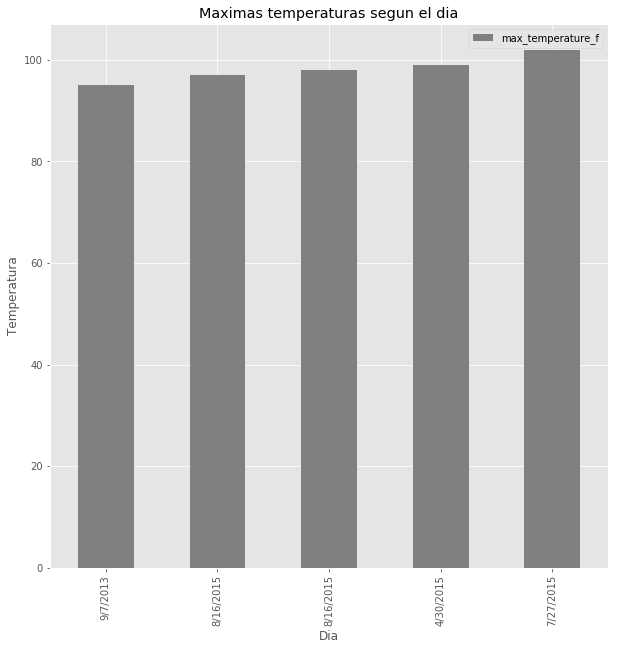

In [490]:
plt.rcParams['figure.figsize'] = (10, 10)

su = indexed_max_temp_weather_last5.plot(kind='bar',title='Maximas temperaturas segun el dia',color='grey')

plt.xlabel('Dia')
plt.ylabel('Temperatura')

# Dates with less temperature:

In [491]:
print(weather.groupby(['min_temperature_f'], sort=True)['date'].min())

min_temperature_f
25.0     12/9/2013
28.0    12/10/2013
29.0    12/10/2013
30.0      1/1/2015
31.0      1/2/2015
32.0      1/1/2015
33.0      1/1/2015
34.0      1/1/2014
35.0      1/1/2014
36.0      1/1/2014
37.0      1/1/2015
38.0      1/1/2015
39.0      1/1/2014
40.0     1/10/2014
41.0      1/1/2014
42.0     1/11/2015
43.0     1/11/2014
44.0     1/10/2014
45.0     1/13/2014
46.0     1/10/2015
47.0     1/10/2015
48.0     1/10/2014
49.0     1/18/2015
50.0     1/10/2015
51.0     1/27/2015
52.0     1/30/2014
53.0     1/28/2014
54.0     1/29/2014
55.0     1/27/2015
56.0     1/29/2014
57.0     10/1/2013
58.0    10/14/2014
59.0    10/14/2014
60.0    10/10/2014
61.0     10/4/2013
62.0    10/15/2014
63.0      6/9/2014
64.0     6/26/2015
65.0     7/19/2015
66.0     6/30/2015
68.0      6/8/2015
69.0     4/30/2014
71.0     8/15/2015
73.0     8/16/2015
75.0     4/16/2015
Name: date, dtype: object


In [492]:
weather.sort("min_temperature_f", ascending=True).head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
838,12/9/2013,51.0,38.0,25.0,23.0,20.0,13.0,75.0,48.0,21.0,...,10.0,10.0,9.0,3.0,10.0,0,0.0,NaN,149.0,95113
655,12/10/2013,52.0,38.0,28.0,32.0,26.0,20.0,74.0,62.0,45.0,...,10.0,10.0,14.0,1.0,14.0,0,0.0,NaN,328.0,94041
839,12/10/2013,53.0,41.0,28.0,29.0,25.0,22.0,78.0,55.0,32.0,...,10.0,10.0,7.0,1.0,8.0,0,1.0,NaN,139.0,95113
650,12/5/2013,51.0,38.0,28.0,26.0,22.0,20.0,72.0,55.0,32.0,...,10.0,10.0,14.0,1.0,28.0,0,0.0,NaN,341.0,94041
470,12/9/2013,51.0,40.0,29.0,25.0,19.0,13.0,64.0,45.0,26.0,...,10.0,10.0,18.0,4.0,23.0,0,0.0,NaN,5.0,94301


In [493]:
min_temp_weather = weather.groupby(['min_temperature_f'], sort=True)['date'].max()
min_temp_weather = min_temp_weather.reset_index()
min_temp_weather.head()

,min_temperature_f,date
0,25.0,12/9/2013
1,28.0,12/5/2013
2,29.0,12/9/2013
3,30.0,12/6/2013
4,31.0,12/8/2013


In [494]:
indexed_min_temp_weather = min_temp_weather.set_index(min_temp_weather['date'])
indexed_min_temp_weather.head()

,min_temperature_f,date
date,,
12/9/2013,25.0,12/9/2013
12/5/2013,28.0,12/5/2013
12/9/2013,29.0,12/9/2013
12/6/2013,30.0,12/6/2013
12/8/2013,31.0,12/8/2013


In [495]:
indexed_min_temp_weather_first5 = indexed_min_temp_weather.head(5)
indexed_min_temp_weather_first5.head()

,min_temperature_f,date
date,,
12/9/2013,25.0,12/9/2013
12/5/2013,28.0,12/5/2013
12/9/2013,29.0,12/9/2013
12/6/2013,30.0,12/6/2013
12/8/2013,31.0,12/8/2013


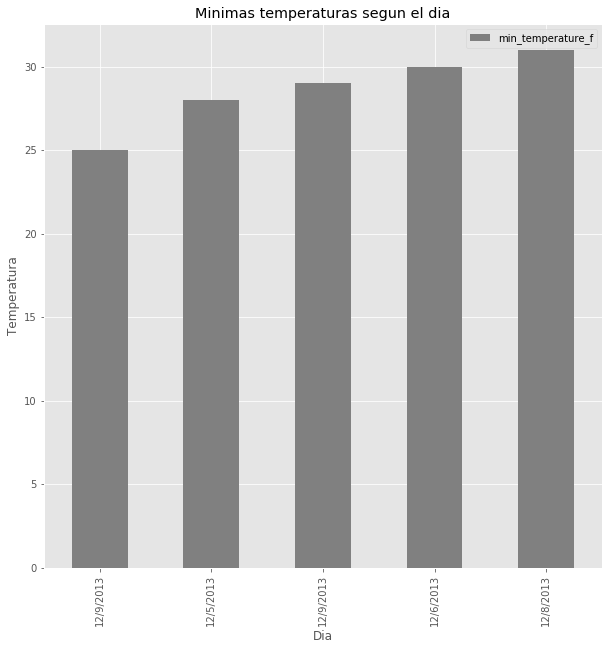

In [496]:
plt.rcParams['figure.figsize'] = (10, 10)

su = indexed_min_temp_weather_first5.plot(kind='bar',title='Minimas temperaturas segun el dia',color='grey')

plt.xlabel('Dia')
plt.ylabel('Temperatura')

In [497]:
#Date time index 

In [498]:
weatherWithDates = weather
weatherWithDates['dates']= pd.to_datetime(weather['date'], format = '%m/%d/%Y')

weatherWithDates['anio'] = pd.DatetimeIndex(weather['date']).year
weatherWithDates['mes'] = pd.DatetimeIndex(weather['date']).month
weatherWithDates['dia'] = pd.DatetimeIndex(weather['date']).day
weatherWithDates['hora'] = pd.DatetimeIndex(weather['date']).hour
weatherWithDates['minutos'] = pd.DatetimeIndex(weather['date']).minute

print(weatherWithDates.describe())

       max_temperature_f  mean_temperature_f  min_temperature_f  \
count        3661.000000         3661.000000        3661.000000   
mean           70.580989           61.348812          51.947282   
std             8.385572            7.234397           7.441444   
min            44.000000           38.000000          25.000000   
25%            64.000000           56.000000          47.000000   
50%            70.000000           61.000000          53.000000   
75%            77.000000           67.000000          58.000000   
max           102.000000           84.000000          75.000000   

       max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
count      3611.000000       3611.000000      3611.000000   3611.000000   
mean         53.149820         48.794794        44.306840     85.446968   
std           6.885449          7.822281         9.355432      9.226972   
min          20.000000         13.000000         2.000000     24.000000   
25%          49.00000

In [499]:
weatherWithDates.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,events,wind_dir_degrees,zip_code,dates,anio,mes,dia,hora,minutos
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,4.0,NaN,286.0,94107,2013-08-29,2013,8,29,0,0
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,2.0,NaN,291.0,94107,2013-08-30,2013,8,30,0,0
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,4.0,NaN,284.0,94107,2013-08-31,2013,8,31,0,0
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,4.0,NaN,284.0,94107,2013-09-01,2013,9,1,0,0
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,6.0,NaN,277.0,94107,2013-09-02,2013,9,2,0,0
